In [31]:
import pandas as pd
import io
import requests
from matplotlib import pyplot as plt

url="https://raw.githubusercontent.com/abeasock/coding_assessment/master/patients.csv?_sm_au_=iVV7V2PTJZ3j1f00"
s=requests.get(url).content
patients = pd.read_csv(io.StringIO(s.decode('utf-8')))

url="https://raw.githubusercontent.com/abeasock/coding_assessment/master/appointments.csv?_sm_au_=iVV7V2PTJZ3j1f00"
s=requests.get(url).content
appointments = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
appointments.head()


,id,appointment_registration,appointment_date,status,sms_reminder
0,613126,2014-06-23T12:26:17Z,2014-06-27T00:00:00Z,Show-Up,No
1,232334,2014-01-17T12:41:37Z,2014-01-27T00:00:00Z,Show-Up,No
2,328426,2014-02-10T14:06:22Z,2014-03-21T00:00:00Z,No-Show,Yes
3,400712,2015-03-25T10:26:31Z,2015-03-31T00:00:00Z,Show-Up,Yes
4,359683,2014-11-06T12:53:01Z,2014-12-01T00:00:00Z,Show-Up,No


In [4]:
patients.head()

,patient_id,age,gender,diabetes,alcoholism,hypertension,handicap,smokes,tuberculosis
0,395728,30,F,0,0,0,0,0,0
1,799589,5,F,0,0,0,0,0,0
2,401681,22,F,0,0,0,0,0,0
3,543473,62,M,0,0,1,0,0,0
4,370260,20,F,0,0,0,0,0,0


In [60]:
patient_appt = patients.merge(appointments, how='inner', left_on='patient_id', right_on='id')

1    209204
0     90696
Name: new_status, dtype: int64

In [76]:
patient_appt['new_status'] = patient_appt['status'].apply(lambda x: 1 if x=='Show-Up' else 0)
patient_appt['new_gender'] = patient_appt['gender'].apply(lambda x: 1 if x=='F' else 0)
patient_appt.head()
patient_appt.new_gender.value_counts()

1    200445
0     99455
Name: new_gender, dtype: int64

In [15]:
#n=len(patient_appt.unique(patient_appt['patient_id']))
n1=patient_appt.nunique(axis=0)

In [22]:
print("unique count:\n", n1)

unique count:
 patient_id                  299897
age                            109
gender                           2
diabetes                         2
alcoholism                       2
hypertension                     2
handicap                         5
smokes                           2
tuberculosis                     2
id                          299897
appointment_registration    295326
appointment_date               534
status                           2
sms_reminder                     2
dtype: int64


In [59]:
patient_appt.groupby(['status','sms_reminder']).id.nunique()


1    299900
Name: status, dtype: int64

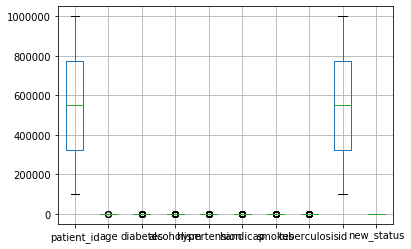

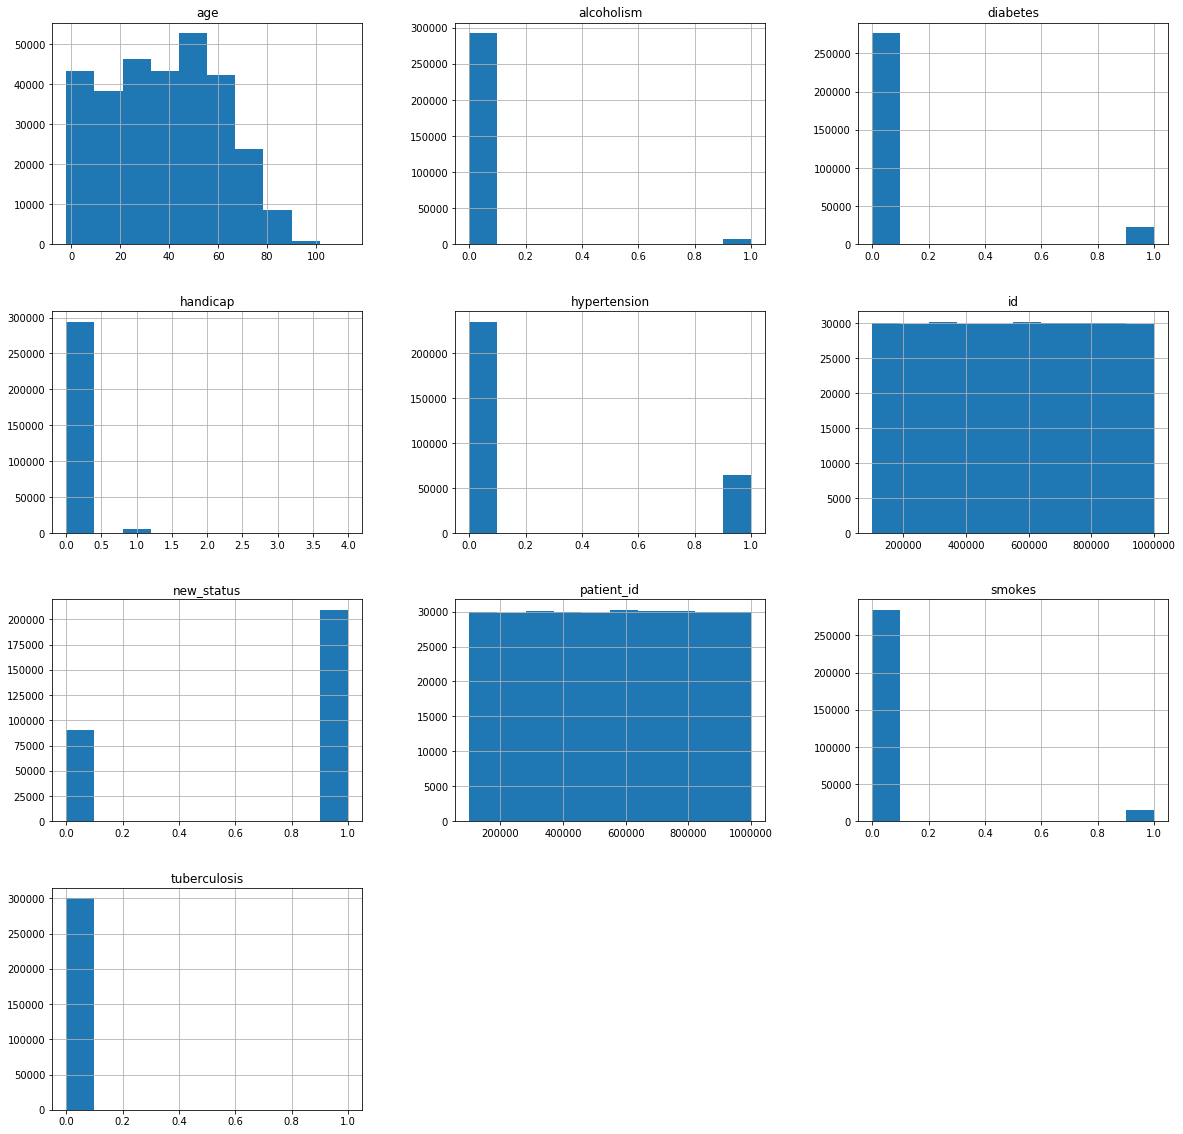

In [72]:
patient_appt.boxplot()
patient_appt.hist(figsize=(20,20));

In [81]:
X = patient_appt[['age','new_gender','diabetes','alcoholism','hypertension','handicap','smokes','tuberculosis']]
y = patient_appt['new_status']
X_d = X.fillna(X.median())

In [82]:
X_d.head()

,age,new_gender,diabetes,alcoholism,hypertension,handicap,smokes,tuberculosis
0,30,1,0,0,0,0,0,0
1,5,1,0,0,0,0,0,0
2,22,1,0,0,0,0,0,0
3,62,0,0,0,1,0,0,0
4,20,1,0,0,0,0,0,0


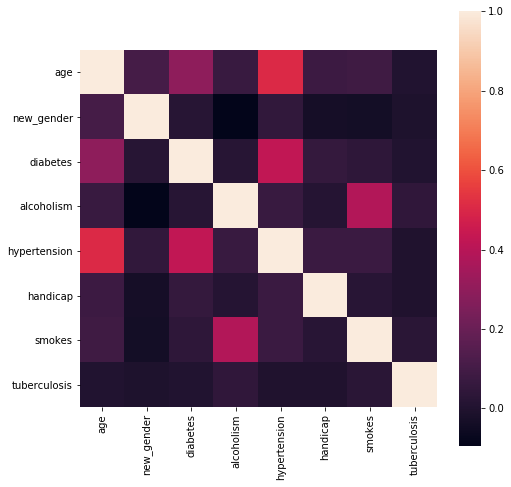

In [83]:
%matplotlib inline
import seaborn as sns
corr=X_d.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr,vmax=1,square=True)

In [84]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_d)
X_Sscaled = scaler.transform(X_d)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Sscaled,y,random_state=42, stratify=y)